In [ ]:
#import the required libraries
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load the data file

In [ ]:
df = pd.read_csv("churn.csv")


In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
#Look at the top 5 records of data

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Checking the data types of all the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# Check the descriptive statistics of numeric variables
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 75% customers pay more than USD 89.85 per month

In [ ]:
df.shape

(7043, 21)

In [ ]:
#Converting TotalCharges to Float data type
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()
# 11 columns are empty in the total charges

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df['Churn'] = np.where(df.Churn == 'Yes',1,0)

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [ ]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0


In [ ]:
df.dropna(how = 'any', inplace=True) #Removing missing values
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Remove columns not required for processing

In [ ]:
df.drop('customerID', axis=1, inplace=True)

In [ ]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df['tenure_group'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)

In [ ]:
df['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


# Exploratory Data Analysis

In [ ]:
df.dtypes

gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                  int64
tenure_group        category
dtype: object

<Axes: xlabel='PaperlessBilling', ylabel='count'>

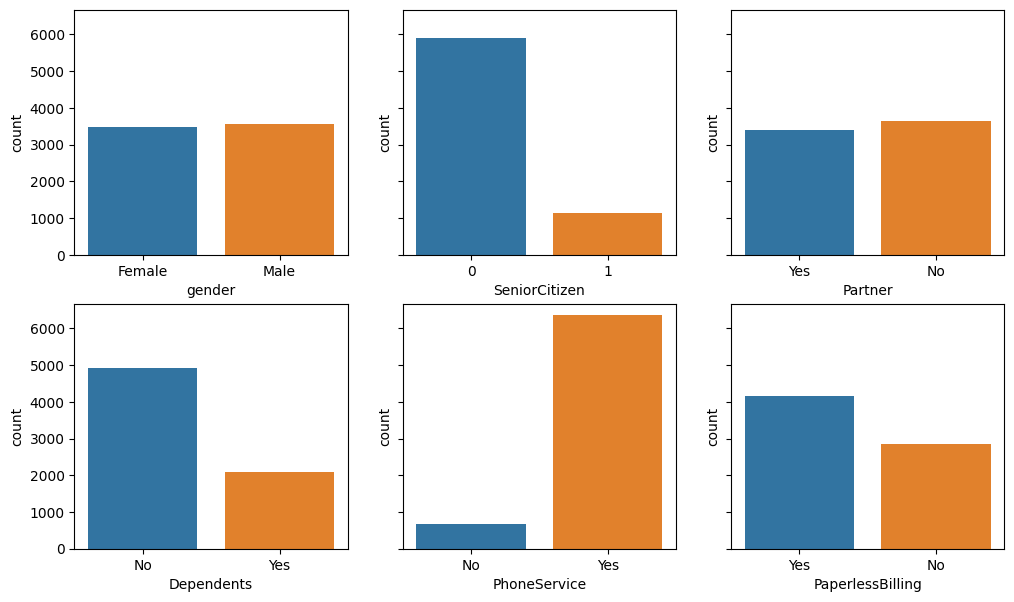

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot(x="gender", data=df, ax=axes[0,0])
sns.countplot(x="SeniorCitizen", data=df, ax=axes[0,1])
sns.countplot(x="Partner", data=df, ax=axes[0,2])
sns.countplot(x="Dependents", data=df, ax=axes[1,0])
sns.countplot(x="PhoneService", data=df, ax=axes[1,1])
sns.countplot(x="PaperlessBilling", data=df, ax=axes[1,2])

In [ ]:
df[['gender','Churn']].groupby(['gender']).mean()

,Churn
gender,
Female,0.269595
Male,0.262046


Churn rate for both males and females are approximately equal which indicates gender variable does not bring a valuable prediction power to a model. 

In [ ]:
df[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean()

,Churn
SeniorCitizen,
0,0.236503
1,0.416813


Churn rate of non-senior citizens is higher i.e. 41% whereas in case of senior citizens it is 23%

In [ ]:
df[['Dependents','Churn']].groupby(['Dependents']).mean()

,Churn
Dependents,
No,0.312791
Yes,0.155312


People who do not have Dependents have a higher churn rate of 31%

In [ ]:
df[['PhoneService','Churn']].groupby(['PhoneService']).mean()

,Churn
PhoneService,
No,0.250000
Yes,0.267475


Churn rate of people having phone service or not is approximately the same

In [ ]:
df[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).mean()

,Churn
PaperlessBilling,
No,0.163757
Yes,0.335893


People who use paperless billing churn more as compared to the people who do not.

In [ ]:
df[['Partner','Churn']].groupby(['Partner']).mean()

,Churn
Partner,
No,0.329761
Yes,0.197171


## Internet Service

<Axes: xlabel='InternetService', ylabel='count'>

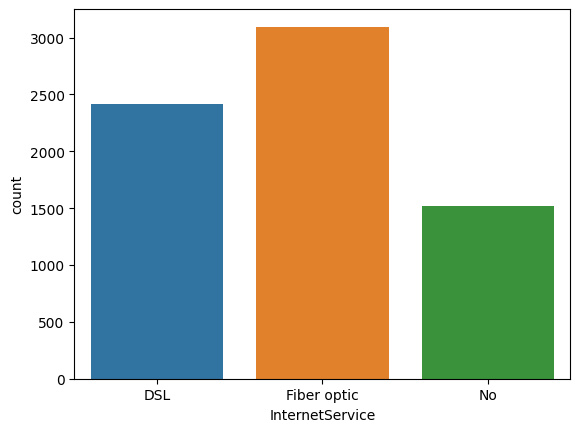

In [ ]:
sns.countplot(x = "InternetService", data=df)

In [ ]:
df[['InternetService','Churn']].groupby(['InternetService']).mean()

,Churn
InternetService,
DSL,0.189983
Fiber optic,0.418928
No,0.074342


In [ ]:
df[['InternetService','MonthlyCharges']].groupby(['InternetService']).mean()

,MonthlyCharges
InternetService,
DSL,58.088017
Fiber optic,91.500129
No,21.076283


People using fibre optic service churn way more i.e. approximately 42% as compared to the people having no internet service or using DSL. This is because people using fibre optics are charged USD 91.5 which is much higher as compared to other services.

<Axes: xlabel='TechSupport', ylabel='count'>

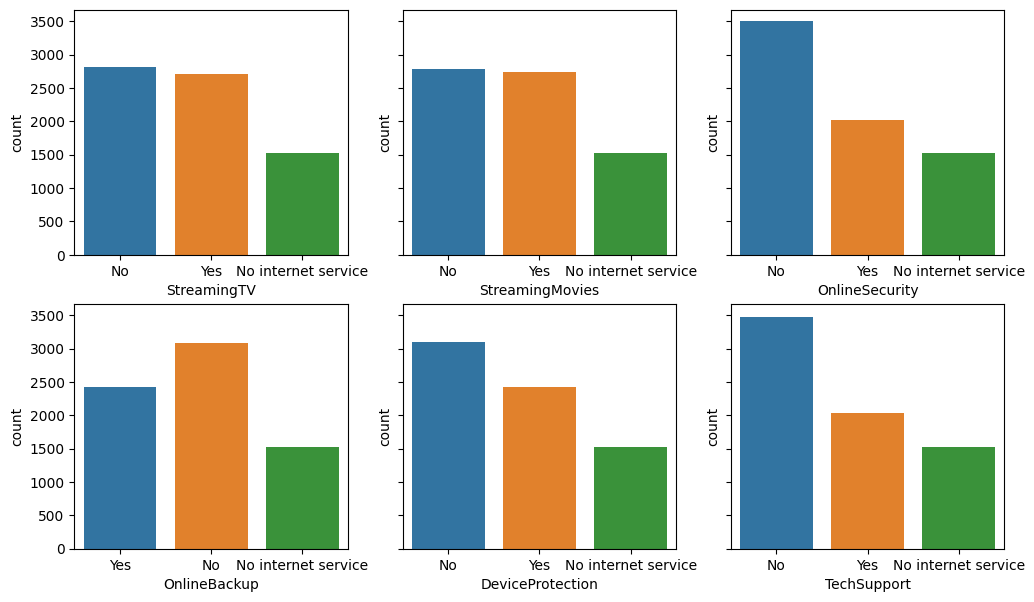

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot(x = "StreamingTV", data=df, ax=axes[0,0])
sns.countplot(x = "StreamingMovies", data=df, ax=axes[0,1])
sns.countplot(x = "OnlineSecurity", data=df, ax=axes[0,2])
sns.countplot(x = "OnlineBackup", data=df, ax=axes[1,0])
sns.countplot(x = "DeviceProtection", data=df, ax=axes[1,1])
sns.countplot(x = "TechSupport", data=df, ax=axes[1,2])

StreamingTV and StreamingMovies have approximately equal churn rate

In [ ]:
df[['OnlineSecurity','Churn']].groupby(['OnlineSecurity']).mean()

,Churn
OnlineSecurity,
No,0.417787
No internet service,0.074342
Yes,0.146402


People with no Online Security churn at a rate of 42% as compared to people having online security

In [ ]:
df[['OnlineBackup','Churn']].groupby(['OnlineBackup']).mean()

,Churn
OnlineBackup,
No,0.399417
No internet service,0.074342
Yes,0.215670


People without any online backup churn more at a rate of 40 %.

In [ ]:
df[['DeviceProtection','Churn']].groupby(['DeviceProtection']).mean()

,Churn
DeviceProtection,
No,0.391403
No internet service,0.074342
Yes,0.225393


In [ ]:
df[['TechSupport','Churn']].groupby(['TechSupport']).mean()

,Churn
TechSupport,
No,0.416475
No internet service,0.074342
Yes,0.151961


# Phone Service

In [ ]:
df.PhoneService.value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [ ]:
df.MultipleLines.value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

<Axes: xlabel='MultipleLines', ylabel='count'>

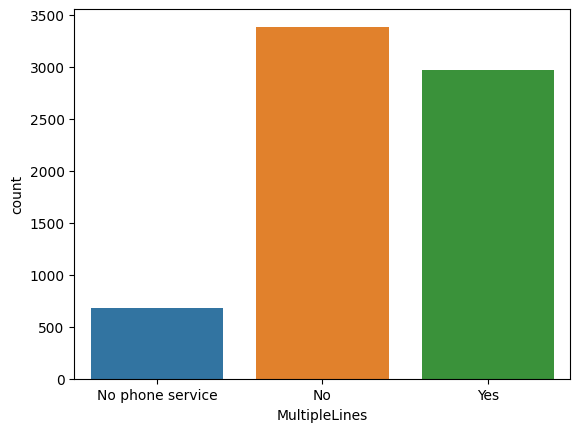

In [ ]:
sns.countplot(x = "MultipleLines", data=df)

People who do not have phone service will not have multiple lines services. Further, there is not much difference in churn rate of multiple lines.Hence, it can be ignored.

# Contract and Payment Method

<Axes: xlabel='Contract', ylabel='count'>

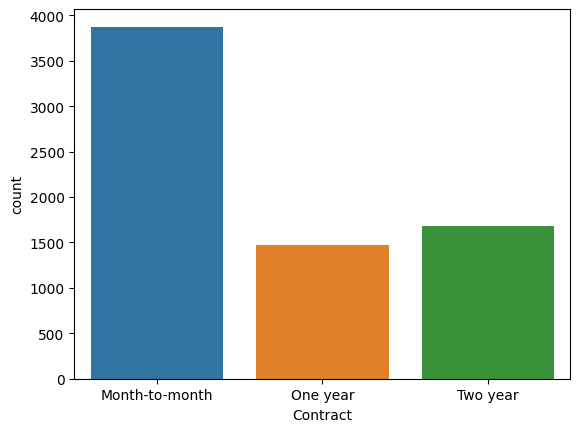

In [ ]:
sns.countplot(x = "Contract", data=df)

In [ ]:
df[['Contract','Churn']].groupby(['Contract']).mean()

,Churn
Contract,
Month-to-month,0.427097
One year,0.112772
Two year,0.028487


In [ ]:
df[['Contract','tenure']].groupby(['Contract']).mean()

,tenure
Contract,
Month-to-month,18.036645
One year,42.073370
Two year,57.071810


People with monthly contracts have a higher churn rate of 42% and have a less tenure of 18 months. However, churn rate of customers with 2 year contract is 2.85% and have a higher tenure of 57 months.

<Axes: xlabel='PaymentMethod', ylabel='count'>

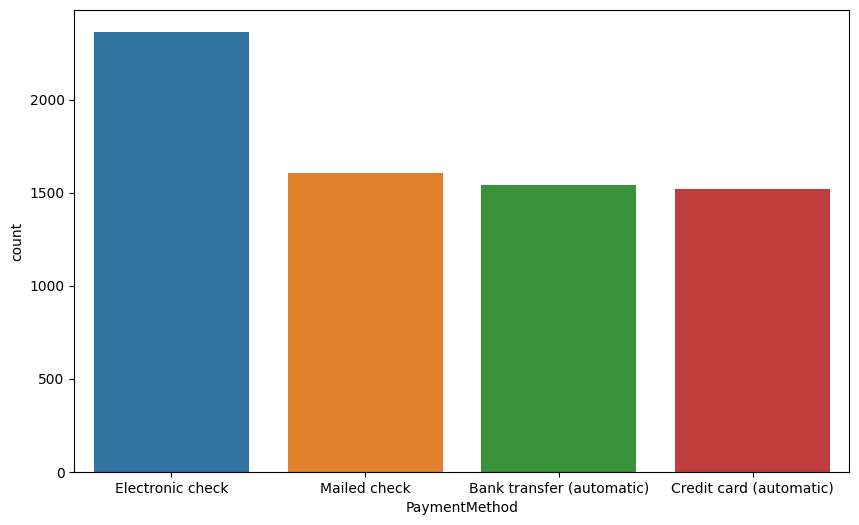

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x = "PaymentMethod", data=df)

In [ ]:
df[['PaymentMethod','Churn']].groupby(['PaymentMethod']).mean()

,Churn
PaymentMethod,
Bank transfer (automatic),0.167315
Credit card (automatic),0.152531
Electronic check,0.452854
Mailed check,0.192020


In [ ]:
df[['PaymentMethod','MonthlyCharges']].groupby(['PaymentMethod']).mean()

,MonthlyCharges
PaymentMethod,
Bank transfer (automatic),67.205577
Credit card (automatic),66.519264
Electronic check,76.255814
Mailed check,43.958354


People who use electronic check as payment method tend to have a higher churn rate of of 45% and they also have a higher monthly charge of USD 76 per month

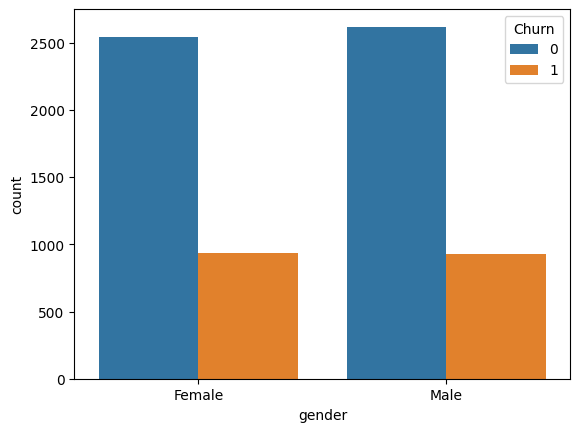

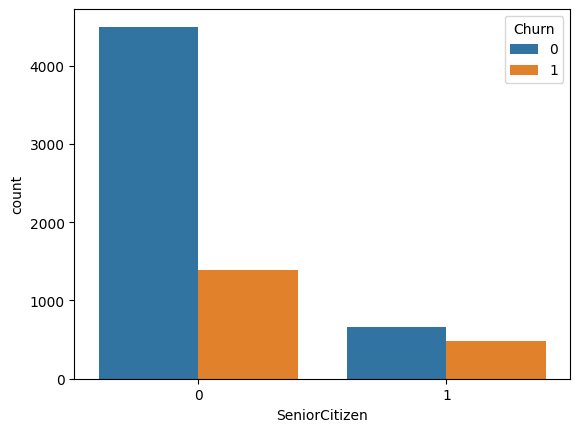

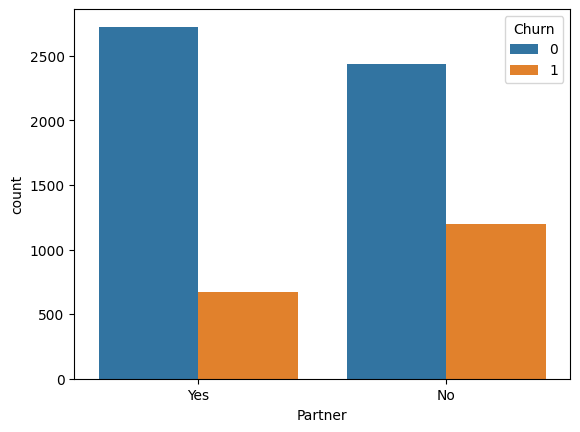

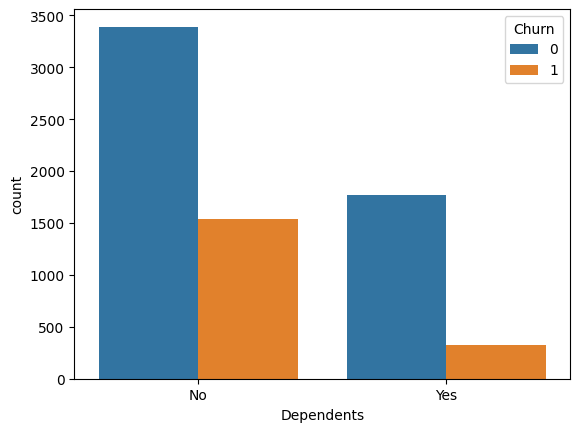

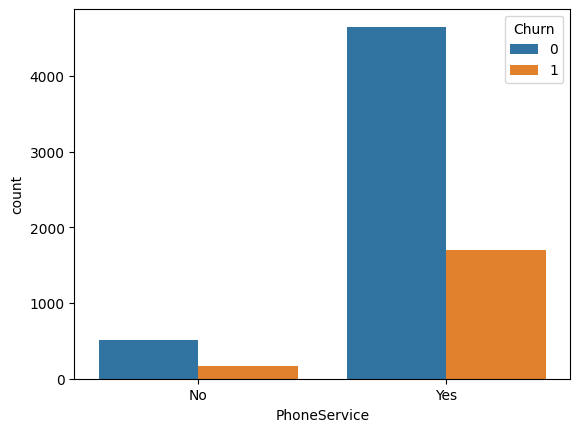

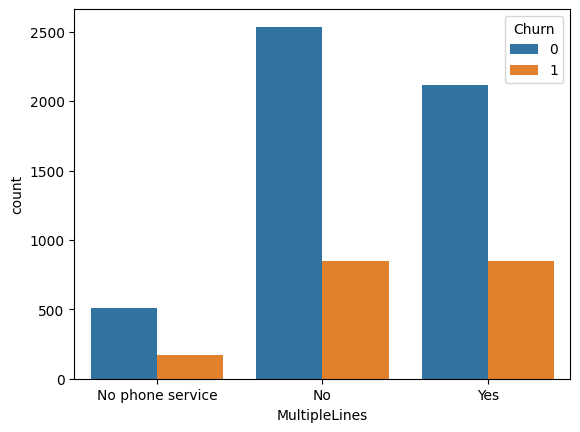

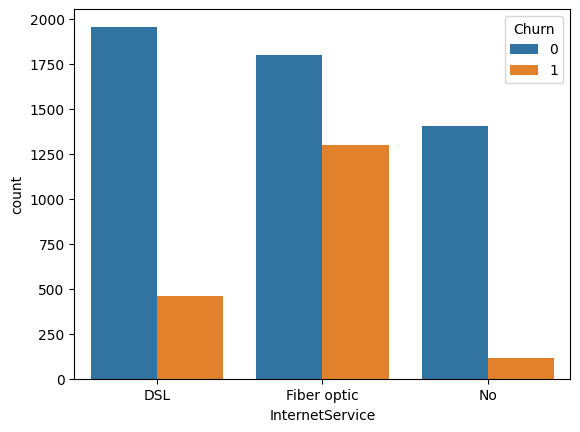

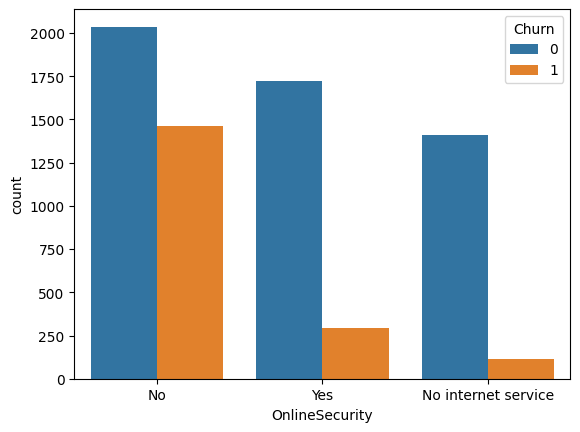

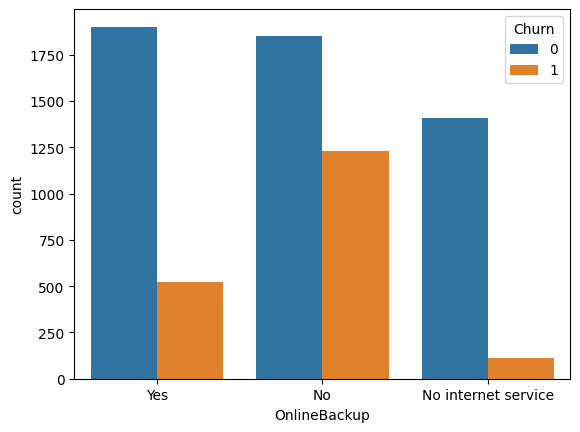

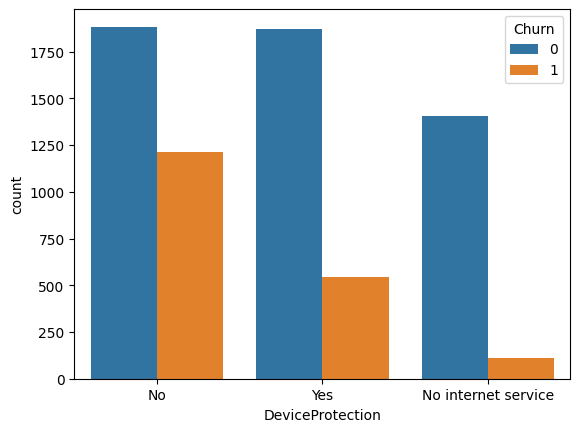

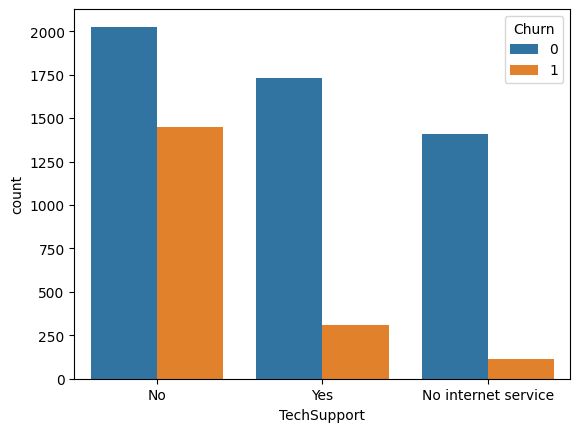

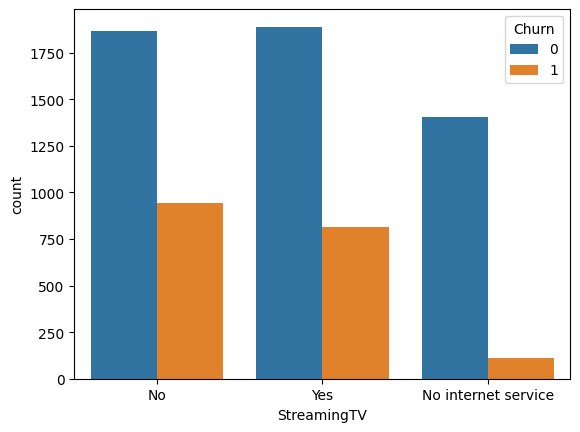

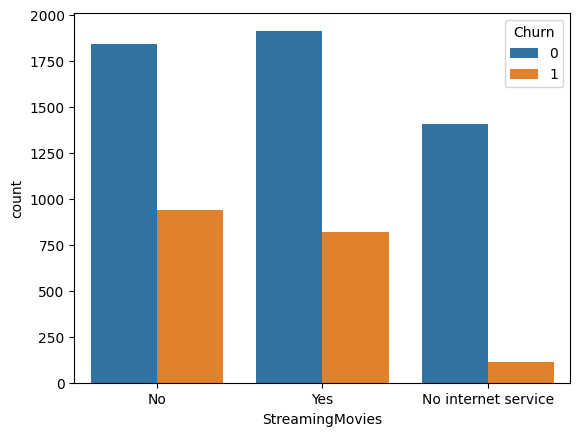

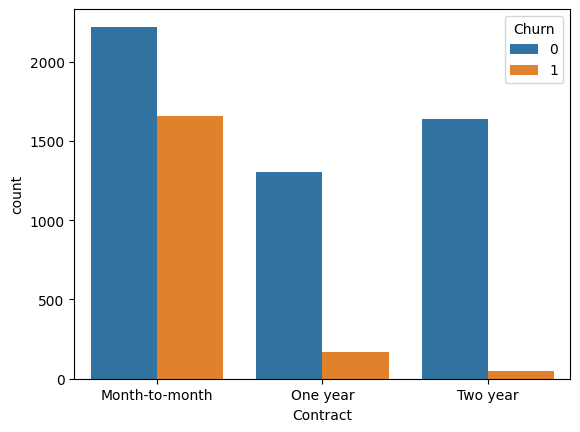

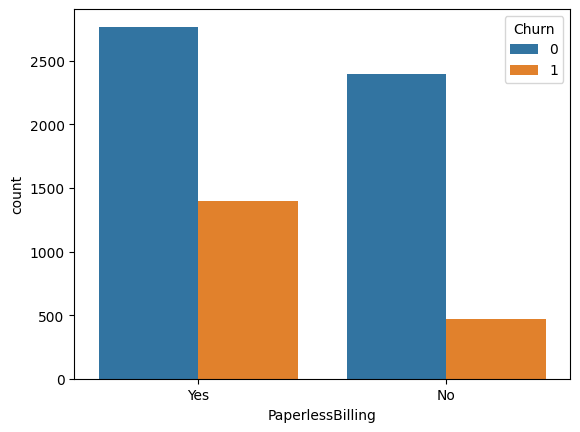

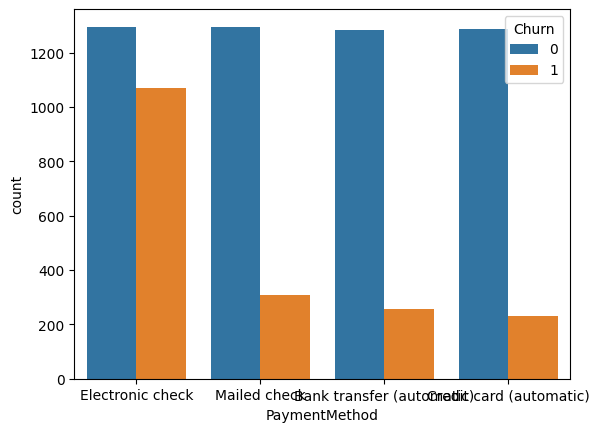

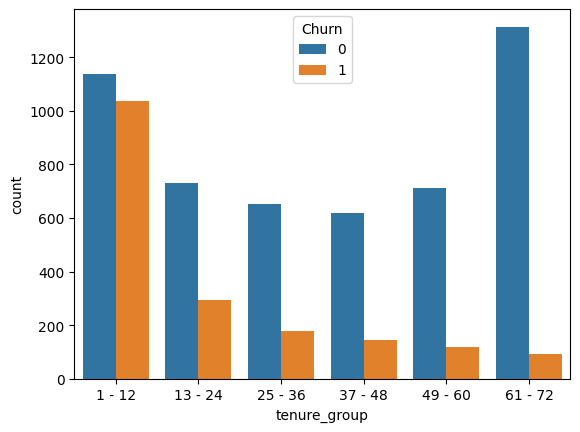

In [ ]:
for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges','tenure'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn')

In [ ]:
df_dummies = pd.get_dummies(df)
df_dummies.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
tenure_group        0
dtype: int64

In [ ]:
df.dtypes

gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                  int64
tenure_group        category
dtype: object

Building a correlation of all parameters with 'Churn'

<Axes: >

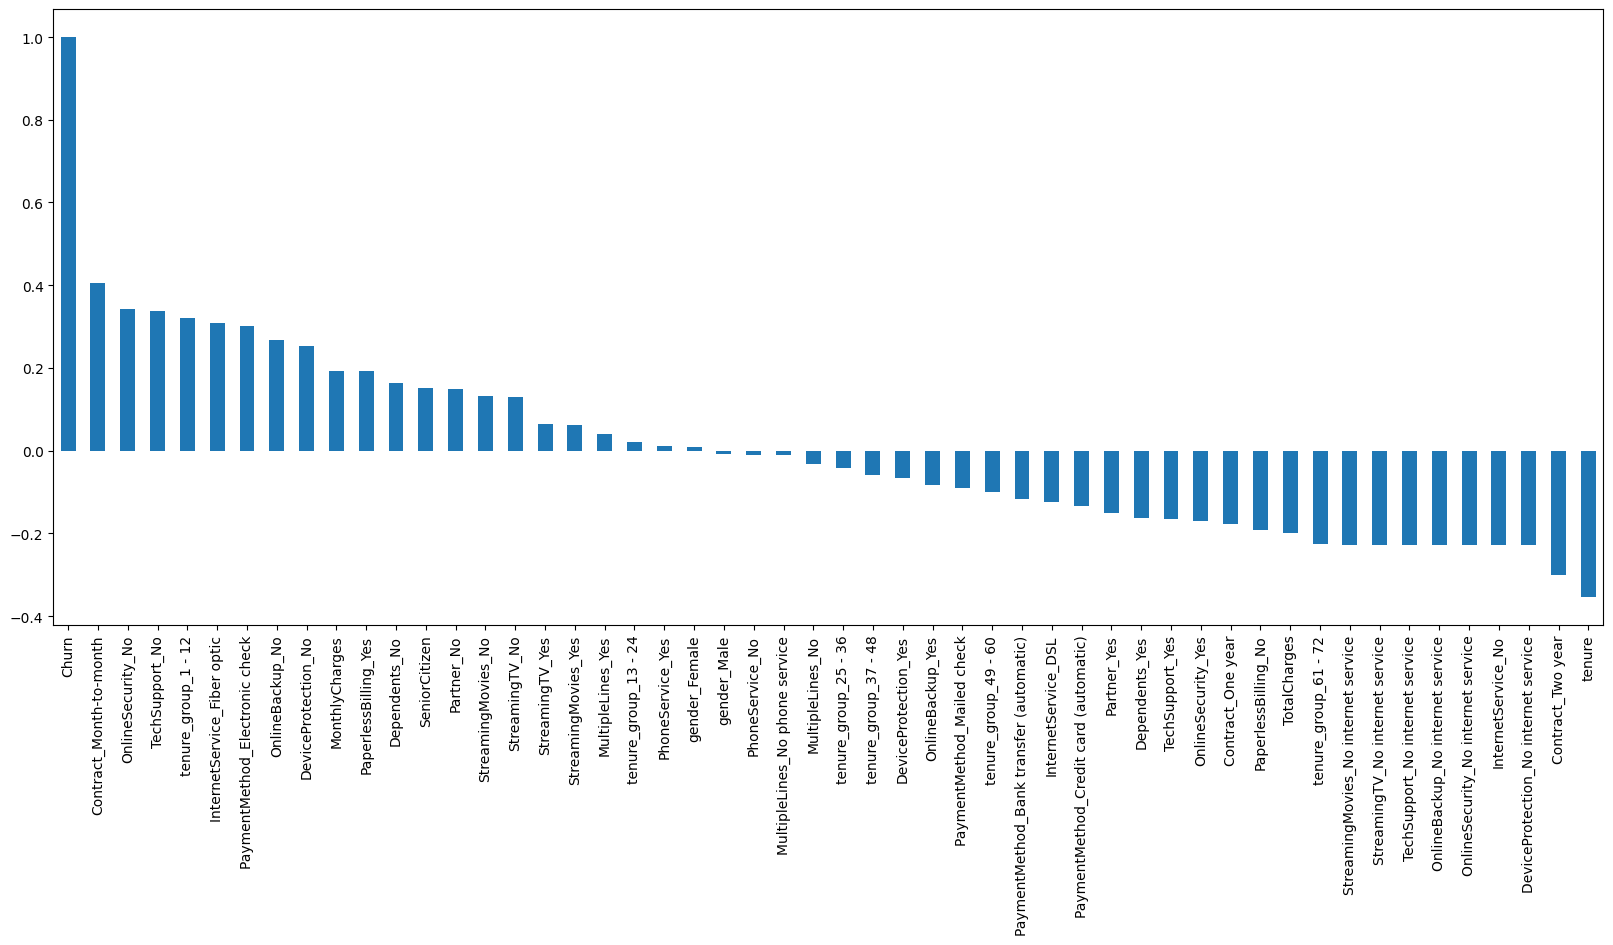

In [ ]:
plt.figure(figsize=(20,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

HIGH CHURN: Month to month contracts, tenure group(1-12) No online security, Paperless Security Billing, No Tech support, First year of subscription, No dependents and Fibre Optics Internet

LOW CHURN: Long term contracts, Subscriptions without internet service and The customers engaged for 2 years

<ipython-input-48-3a541a3f6360>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 0) ],
<ipython-input-48-3a541a3f6360>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

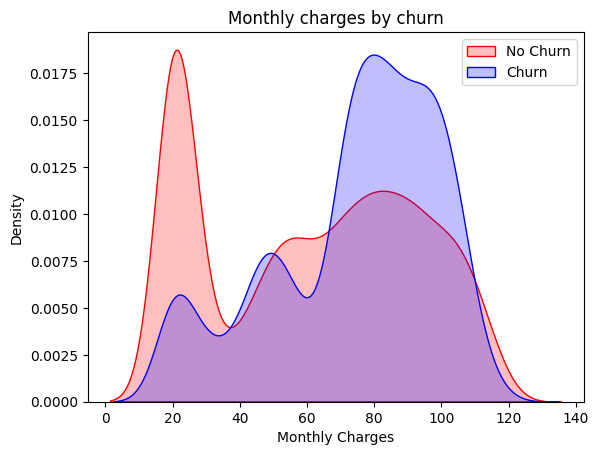

In [ ]:
Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

<ipython-input-49-8cd322328d36>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"] == 0) ],
<ipython-input-49-8cd322328d36>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

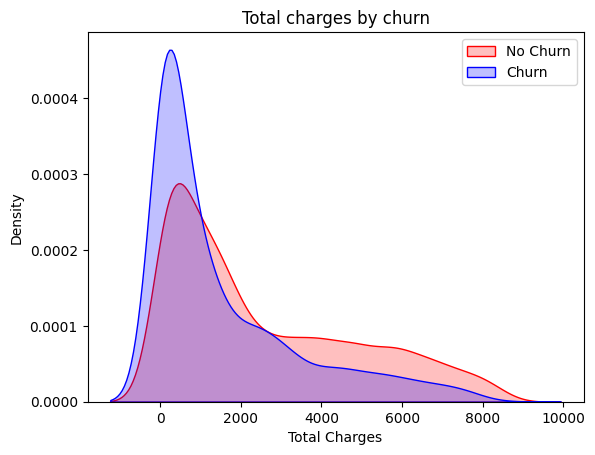

In [ ]:
Tot = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

OBSERVATION: 1. Churn is high when monthly charges are high

              2. Churn is high when total charges are low


CONCLUSION:

Electronic check medium are the highest churners

Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.

No Online security, No Tech Support category , No Dependents are high churners

Non senior Citizens are high churners

Customers with fibre optic connection and Paperless Billing are more likely to churn

Churn is high when monthly charges are high and total charges is low

## Data Modelling

In [ ]:
#Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn import metrics

Divide the data into source and target tables

In [ ]:
x = df_dummies.drop('Churn',axis=1)
x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0


In [ ]:
y=df['Churn']

In [ ]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

# Train Test Split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Decision Tree Classifier

In [ ]:
dec_tree = DecisionTreeClassifier(criterion = 'gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [ ]:
dec_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
y_pred=dec_tree.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
dec_tree.score(x_test,y_test)

0.7945984363894811

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
cm

array([[911, 134],
       [155, 207]])

In [ ]:
print(metrics.classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1045
           1       0.61      0.57      0.59       362

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407



**Pruned Decision Tree**

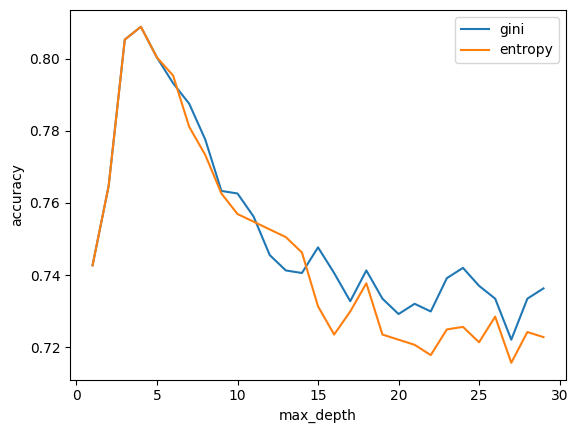

In [ ]:
# we'll iterate over 30 max_depths to see which gives the best result
# we'll try out different criterion as well (gini is computationally faster with respect to entropy)
# we'll plot max depth vs accuracy
from sklearn.metrics import classification_report, accuracy_score
max_depth=[]
acc_gini=[]
acc_entropy=[]
for i in range(1,30):
    dtree=DecisionTreeClassifier(criterion='gini',max_depth=i)
    dtree.fit(x_train,y_train)
    pred=dtree.predict(x_test)
    
    acc_gini.append(accuracy_score(y_test,pred))
    
    dtree=DecisionTreeClassifier(criterion='entropy',max_depth=i)
    dtree.fit(x_train,y_train)
    pred=dtree.predict(x_test)
    acc_entropy.append(accuracy_score(y_test,pred))
    
    max_depth.append(i)
    
    d=pd.DataFrame({'acc_gini': pd.Series(acc_gini),
                   'acc_entropy': pd.Series(acc_entropy),
                   'max_depth': pd.Series(max_depth)})
    
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

Best accuracy is obtained at depth 5-10

In [ ]:
pruned_model=DecisionTreeClassifier(criterion='gini', max_depth=5)
pruned_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
pruned_model_pred=pruned_model.predict(x_test)

In [ ]:
print(classification_report(y_test,pruned_model_pred, zero_division='warn'))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1045
           1       0.61      0.62      0.61       362

    accuracy                           0.80      1407
   macro avg       0.74      0.74      0.74      1407
weighted avg       0.80      0.80      0.80      1407



Hyperparameter Tuning

In [ ]:
# we are going to tune criterion, depth, min_samples_split, min_samples_leaf
criterion=['gini', 'entropy']
max_depth=[1,6,8,11]
min_samples_split=[1,9,11,12]
min_samples_leaf=[1,3,7,9]
param_grid={'max_depth':max_depth,
            'min_samples_split':min_samples_split,
           'min_samples_leaf':min_samples_leaf,
           'criterion':criterion}

In [ ]:
param=dict(criterion='criterion',max_depth='max_depth', min_samples_split='min_samples_split',min_samples_leaf='min_samples_leaf')

In [ ]:
from sklearn.model_selection import GridSearchCV
#cv=3 i.e 3 cross folds, verbose=200 i.e the more the verbose the more info we get
grid=GridSearchCV(DecisionTreeClassifier(),param_grid,n_jobs=-1,cv=3,verbose=200)
grid.fit(x_train,y_train)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
96 fits failed out of a total of 384.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
96 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_pa

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 6, 8, 11],
                         'min_samples_leaf': [1, 3, 7, 9],
                         'min_samples_split': [1, 9, 11, 12]},
             verbose=200)

In [ ]:
#best parameters that achieves higher score
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 12}

In [ ]:
grid.best_score_

0.781688888888889

In [ ]:
tuned_model=DecisionTreeClassifier(criterion= 'gini',
 max_depth=6,
 min_samples_leaf= 9,
 min_samples_split= 9)
tuned_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=9, min_samples_split=9)

In [ ]:
tuned_model_pred=tuned_model.predict(x_test)

In [ ]:
print(classification_report(y_test,tuned_model_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1045
           1       0.61      0.57      0.59       362

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407



As we can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider accuracy as our metrics to measure the model. Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers. It can also be seen through heatmap

Text(95.72222222222221, 0.5, 'Truth')

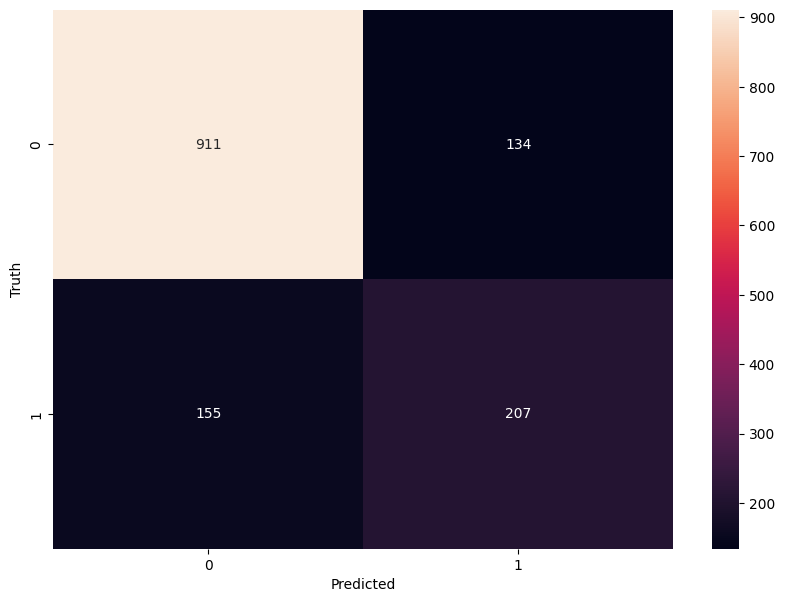

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [ ]:
from imblearn.combine import SMOTEENN

In [ ]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [ ]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [ ]:
basic_model=DecisionTreeClassifier()
basic_model.fit(xr_train,yr_train)

DecisionTreeClassifier()

In [ ]:
basic_model_pred=basic_model.predict(xr_test)

In [ ]:
print(classification_report(yr_test,basic_model_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       538
           1       0.95      0.96      0.95       619

    accuracy                           0.95      1157
   macro avg       0.95      0.95      0.95      1157
weighted avg       0.95      0.95      0.95      1157



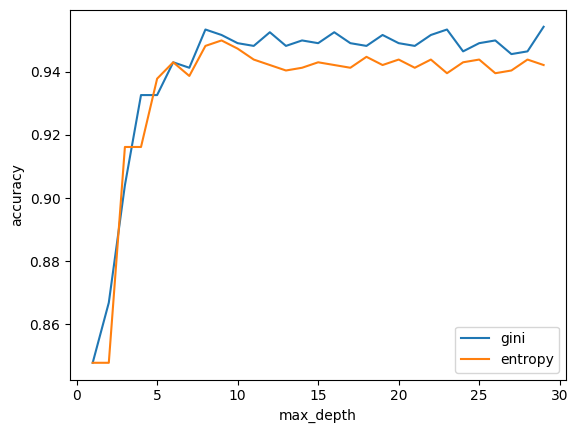

In [ ]:
# we'll iterate over 30 max_depths to see which gives the best result
# we'll try out different criterion as well (gini is computationally faster with respect to entropy)
# we'll plot max depth vs accuracy
from sklearn.metrics import classification_report, accuracy_score
max_depth=[]
acc_gini=[]
acc_entropy=[]
for i in range(1,30):
    dtree=DecisionTreeClassifier(criterion='gini',max_depth=i)
    dtree.fit(xr_train,yr_train)
    pred=dtree.predict(xr_test)
    
    acc_gini.append(accuracy_score(yr_test,pred))
    
    dtree=DecisionTreeClassifier(criterion='entropy',max_depth=i)
    dtree.fit(xr_train,yr_train)
    pred=dtree.predict(xr_test)
    acc_entropy.append(accuracy_score(yr_test,pred))
    
    max_depth.append(i)
    
    d=pd.DataFrame({'acc_gini': pd.Series(acc_gini),
                   'acc_entropy': pd.Series(acc_entropy),
                   'max_depth': pd.Series(max_depth)})
    
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
pruned_model=DecisionTreeClassifier(criterion='gini', max_depth=5)
pruned_model.fit(xr_train,yr_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
pruned_model_pred=pruned_model.predict(xr_test)

In [ ]:
print(classification_report(yr_test,pruned_model_pred, zero_division='warn'))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       538
           1       0.94      0.94      0.94       619

    accuracy                           0.93      1157
   macro avg       0.93      0.93      0.93      1157
weighted avg       0.93      0.93      0.93      1157



Hyperparameter Tuning

In [ ]:
# we are going to tune criterion, depth, min_samples_split, min_samples_leaf
criterion=['gini', 'entropy']
max_depth=[1,6,8,11]
min_samples_split=[1,9,11,12]
min_samples_leaf=[1,3,7,9]
param_grid={'max_depth':max_depth,
            'min_samples_split':min_samples_split,
           'min_samples_leaf':min_samples_leaf,
           'criterion':criterion}

In [ ]:
param=dict(criterion='criterion',max_depth='max_depth', min_samples_split='min_samples_split',min_samples_leaf='min_samples_leaf')

In [ ]:
#cv=3 i.e 3 cross folds, verbose=200 i.e the more the verbose the more info we get
grid=GridSearchCV(DecisionTreeClassifier(),param_grid,n_jobs=-1,cv=3,verbose=200)
grid.fit(xr_train,yr_train)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
96 fits failed out of a total of 384.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
96 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_pa

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 6, 8, 11],
                         'min_samples_leaf': [1, 3, 7, 9],
                         'min_samples_split': [1, 9, 11, 12]},
             verbose=200)

In [ ]:
#best parameters that achieves higher score
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_leaf': 9,
 'min_samples_split': 11}

In [ ]:
grid.best_score_

0.9398793547067572

In [ ]:
tuned_model=DecisionTreeClassifier(criterion= 'gini',
 max_depth=8,
 min_samples_leaf= 1,
 min_samples_split= 9)
tuned_model.fit(xr_train,yr_train)

DecisionTreeClassifier(max_depth=8, min_samples_split=9)

In [ ]:
tuned_model_pred=tuned_model.predict(xr_test)

In [ ]:
print(classification_report(yr_test,tuned_model_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       538
           1       0.94      0.96      0.95       619

    accuracy                           0.95      1157
   macro avg       0.95      0.95      0.95      1157
weighted avg       0.95      0.95      0.95      1157



Accuracy: 92 %, and a very good recall, precision & f1 score for minority class.

# Random forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rand = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [ ]:
rand.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
y_pred = rand.predict(x_test)

In [ ]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
rand.score(x_test,y_test)

0.8137882018479033

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
cm

array([[958,  87],
       [175, 187]])

Text(95.72222222222221, 0.5, 'Truth')

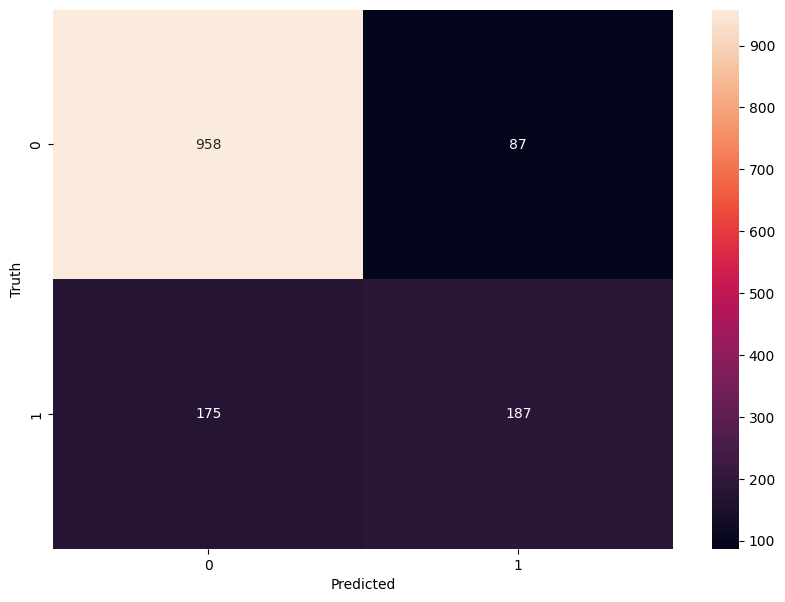

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:

print(metrics.classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1045
           1       0.68      0.52      0.59       362

    accuracy                           0.81      1407
   macro avg       0.76      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



As we can see from the figure, the dataset is imbalanced and the precision of correct prediction is 66%, hence we need to resample the data.

**SVC**

In [ ]:
#Fitting the model on SVC with default parameters
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(xr_train,yr_train)

SVC()

In [ ]:
model_svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
#Calculating predictions, and accuracy score
pred_svc = model_svc.predict(xr_test)
accuracy_score(yr_test,pred_svc)

0.8236819360414867

In [ ]:
#Building classification report
print(classification_report(yr_test,pred_svc))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       538
           1       0.83      0.85      0.84       619

    accuracy                           0.82      1157
   macro avg       0.82      0.82      0.82      1157
weighted avg       0.82      0.82      0.82      1157



**Hyperparameter Tuning with GridSearchCV**

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Create an SVC object
# svc = SVC()

# # Define the parameter grid to search over
# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
#     'degree': [2, 3, 4],
#     'gamma': ['scale', 'auto'] + [0.1, 1, 10],
#     'coef0': [0.0, 0.5, 1.0],
# }

# # Create a GridSearchCV object and fit it to the data
# grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)
# grid_search.fit(x_train, y_train)

# # Print the best parameters and score
# print("Best parameters: {}".format(grid_search.best_params_))
# print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC

# # Create an SVC object
# svc = SVC()

# # Define the parameter grid to search over
# param_grid = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf'],
# }

# # Create a GridSearchCV object and fit it to the data
# grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)
# grid_search.fit(x_train, y_train)

# # Print the best parameters and score
# print("Best parameters: {}".format(grid_search.best_params_))
# print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [ ]:
from sklearn import metrics

In [ ]:
# calculating the accuracy of models with different values of k
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(xr_train,yr_train)
    yhat= knn.predict(xr_test)
    mean_acc[i-1] = metrics.accuracy_score(yr_test, yhat)

mean_acc

array([0.98617113, 0.98357822, 0.97320657, 0.96369922, 0.95246327,
       0.94987035, 0.94209162, 0.92826275, 0.92653414, 0.92480553,
       0.92134831, 0.92134831, 0.92307692, 0.91616249, 0.91356958,
       0.90665514, 0.8988764 , 0.89541919, 0.89369058, 0.89541919])

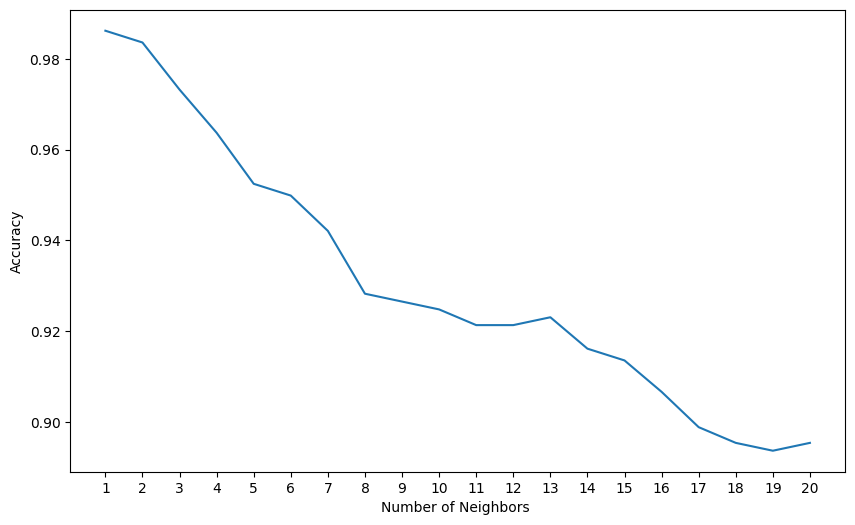

In [ ]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

There are a range of values from 1 to 5 where the accuracy is the highest.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [ ]:
# fit the model on our train set
g_res = gs.fit(xr_train, yr_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [ ]:
# find the best score
g_res.best_score_

0.9623685553510293

In [ ]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}

In [ ]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance',algorithm = 'brute',metric = 'minkowski')
knn.fit(xr_train, yr_train)

KNeighborsClassifier(algorithm='brute', weights='distance')

In [ ]:
# get a prediction
y_hat = knn.predict(xr_train)
y_knn = knn.predict(xr_test)

In [ ]:
print('Training set accuracy: ', metrics.accuracy_score(yr_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(yr_test, y_knn))

Training set accuracy:  1.0
Test set accuracy:  0.9706136560069144


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
model = GaussianNB()
cv_scores = cross_val_score(model, xr_train, yr_train, cv=5)
    
print(model, ' mean accuracy: ', round(cv_scores.mean()*100, 3), '% std: ', round(cv_scores.var()*100, 3),'%')

GaussianNB()  mean accuracy:  90.809 % std:  0.003 %


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xr_train, yr_train, test_size=0.3, random_state=0)
y_pred = model.fit(xr_train, yr_train).predict(xr_test)
print("Number of mislabeled points out of a total %d points : %d" % (xr_test.shape[0], (yr_test != y_pred).sum()))

Number of mislabeled points out of a total 1157 points : 94


In [ ]:
predict_train = model.fit(X_train, y_train).predict(X_train)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)


# predict the target on the test dataset
predict_test = model.predict(X_test)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on train dataset :  0.9100741656365884
accuracy_score on test dataset :  0.9063400576368876


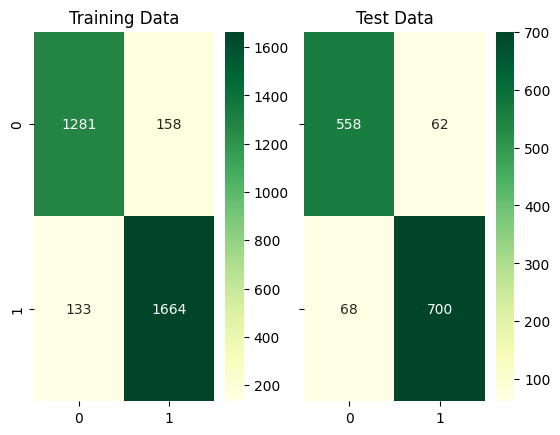

In [ ]:
from sklearn import metrics
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,predict_train)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,predict_test)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][1]);
a[0][1].set_title('Test Data');

In [ ]:
print(classification_report(y_train,predict_train))
print(classification_report(y_test,predict_test))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1439
           1       0.91      0.93      0.92      1797

    accuracy                           0.91      3236
   macro avg       0.91      0.91      0.91      3236
weighted avg       0.91      0.91      0.91      3236

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       620
           1       0.92      0.91      0.92       768

    accuracy                           0.91      1388
   macro avg       0.91      0.91      0.91      1388
weighted avg       0.91      0.91      0.91      1388



Hyperparameter tuning

In [ ]:
np.logspace(0,-9, num=10)

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [ ]:
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(Data_transformed, y_test);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [ ]:
gs_NB.best_params_

{'var_smoothing': 0.23101297000831597}

In [ ]:
gs_NB.best_score_

0.9118692049970133

In [ ]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

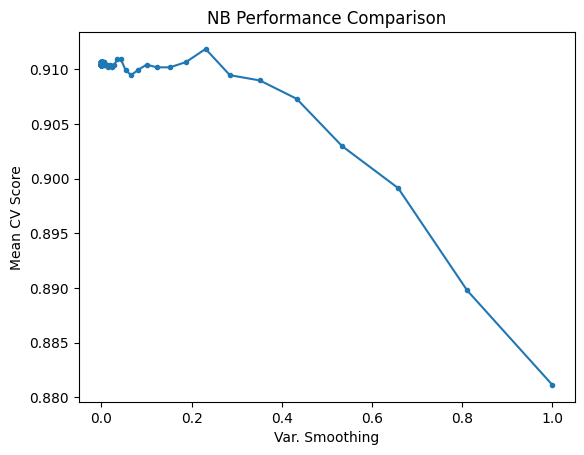

In [ ]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

In [ ]:
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.9113832853025937


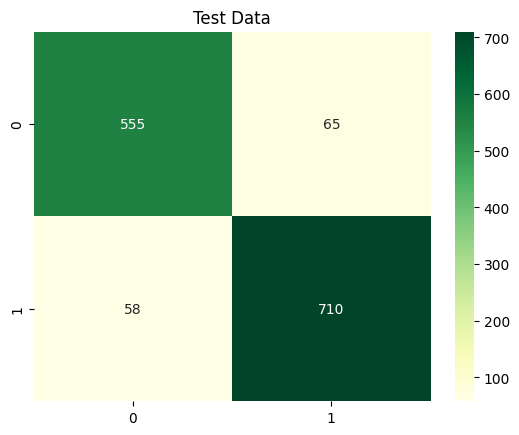

In [ ]:
sns.heatmap((metrics.confusion_matrix(y_test,predict_test)),annot=True,fmt='.5g',cmap="YlGn").set_title('Test Data');

**Ensemble Learning**

**Bagged Decision Trees**

In [ ]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(xr_test)
    y_train_pred = model.predict(xr_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(yr_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(yr_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(yr_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(yr_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(yr_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(yr_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[2023   36]
 [  34 2531]]
ACCURACY SCORE:
0.9849
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.983471     0.985976  0.984862     0.984723      0.984861
recall        0.982516     0.986745  0.984862     0.984630      0.984862
f1-score      0.982993     0.986360  0.984862     0.984677      0.984861
support    2059.000000  2565.000000  0.984862  4624.000000   4624.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[508  30]
 [ 21 598]]
ACCURACY SCORE:
0.9559
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.960302    0.952229   0.95592     0.956266      0.955983
recall       0.944238    0.966074   0.95592     0.955156      0.955920
f1-score     0.952202    0.959102   0.95592     0.955652      0.955894
support    538.000000  619.000000   0.95592  1157.000000   1157.000000


In [ ]:
scores = {
    'Bagging Classifier': {
        'Train': accuracy_score(y_train, bagging_clf.predict(X_train)),
        'Test': accuracy_score(y_test, bagging_clf.predict(X_test)),
    }
}

Extra trees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

ex_tree_clf = ExtraTreesClassifier(n_estimators=1000, max_features=7, random_state=42)
ex_tree_clf.fit(X_train, y_train)
evaluate(ex_tree_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[2017   42]
 [  31 2534]]
ACCURACY SCORE:
0.9842
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.984863     0.983696  0.984213     0.984279      0.984216
recall        0.979602     0.987914  0.984213     0.983758      0.984213
f1-score      0.982225     0.985800  0.984213     0.984013      0.984209
support    2059.000000  2565.000000  0.984213  4624.000000   4624.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[505  33]
 [ 22 597]]
ACCURACY SCORE:
0.9525
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.958254    0.947619  0.952463     0.952937      0.952564
recall       0.938662    0.964459  0.952463     0.951560      0.952463
f1-score     0.948357    0.955965  0.952463     0.952161      0.952427
support    538.000000  619.000000  0.952463  1157.000000   1157.000000


In [ ]:
scores = {
    'Extra Tree' : {
        'Train': accuracy_score(y_train, ex_tree_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ex_tree_clf.predict(X_test)),
    }
}

AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1916  143]
 [ 103 2462]]
ACCURACY SCORE:
0.9468
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.948985     0.945106  0.946799     0.947045      0.946833
recall        0.930549     0.959844  0.946799     0.945196      0.946799
f1-score      0.939676     0.952418  0.946799     0.946047      0.946744
support    2059.000000  2565.000000  0.946799  4624.000000   4624.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[499  39]
 [ 22 597]]
ACCURACY SCORE:
0.9473
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.957774    0.938679  0.947277     0.948226      0.947558
recall       0.927509    0.964459  0.947277     0.945984      0.947277
f1-score     0.942398    0.951394  0.947277     0.946896      0.947211
support    538.000000  619.000000  0.947277  1157.000000   1157.000000


In [ ]:
scores['AdaBoost'] = {
        'Train': accuracy_score(y_train, ada_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ada_boost_clf.predict(X_test)),
    }

Stochastic Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1969   90]
 [  72 2493]]
ACCURACY SCORE:
0.9650
CLASSIFICATION REPORT:
                     0            1  accuracy   macro avg  weighted avg
precision     0.964723     0.965157  0.964965     0.96494      0.964964
recall        0.956289     0.971930  0.964965     0.96411      0.964965
f1-score      0.960488     0.968531  0.964965     0.96451      0.964950
support    2059.000000  2565.000000  0.964965  4624.00000   4624.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[506  32]
 [ 20 599]]
ACCURACY SCORE:
0.9551
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.961977    0.949287  0.955056     0.955632      0.955188
recall       0.940520    0.967690  0.955056     0.954105      0.955056
f1-score     0.951128    0.958400  0.955056     0.954764      0.955018
support    538.000000  619.000000  0.955056  1157.000000   1157.000000


In [ ]:
scores['Gradient Boosting'] = {
        'Train': accuracy_score(y_train, grad_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, grad_boost_clf.predict(X_test)),
    }

XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb_cv = XGBClassifier(n_estimators=100)
scores = cross_val_score(xgb_cv, xr_train, yr_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.96328294 0.93952484 0.96760259 0.95896328 0.95887446 0.96969697
 0.96753247 0.96753247 0.96103896 0.95454545]
Mean: 0.9608594429328772
Standard Deviation: 0.008491780751785406


Voting Ensemble

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

evaluate(voting, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1972   87]
 [  86 2479]]
ACCURACY SCORE:
0.9626
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.958212     0.966095  0.962587     0.962153      0.962585
recall        0.957746     0.966472  0.962587     0.962109      0.962587
f1-score      0.957979     0.966283  0.962587     0.962131      0.962586
support    2059.000000  2565.000000  0.962587  4624.000000   4624.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[506  32]
 [ 29 590]]
ACCURACY SCORE:
0.9473
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.945794    0.948553  0.947277     0.947174      0.947270
recall       0.940520    0.953150  0.947277     0.946835      0.947277
f1-score     0.943150    0.950846  0.947277     0.946998      0.947267
support    538.000000  619.000000  0.947277  1157.000000   1157.000000


In [ ]:
scores['Voting'] : {
        'Train': accuracy_score(y_train, voting.predict(X_train)),
        'Test': accuracy_score(y_test, voting.predict(X_test)),
    }

# Resampling

In [ ]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [ ]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [ ]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [ ]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [ ]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [ ]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.954468802698145
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       527
           1       0.94      0.98      0.96       659

    accuracy                           0.95      1186
   macro avg       0.96      0.95      0.95      1186
weighted avg       0.96      0.95      0.95      1186



In [ ]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[485  42]
 [ 12 647]]


With RF Classifier also we are able to get quite good results, infact better than Decision Tree.

In [ ]:
import xgboost as xgb
#Train the XGboost Model for Classification
model1 = xgb.XGBClassifier()
model2 = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

train_model1 = model1.fit(xr_train1,yr_train1)
train_model2 = model2.fit(xr_train1,yr_train1)

In [ ]:
yr_predict1 = model1.predict(xr_test1)
yr_predict2 = model2.predict(xr_test1)

In [ ]:
print(metrics.classification_report(yr_test1, yr_predict1))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       527
           1       0.98      0.97      0.97       659

    accuracy                           0.97      1186
   macro avg       0.97      0.97      0.97      1186
weighted avg       0.97      0.97      0.97      1186



In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(yr_test1, yr_predict1) 
cm

array([[512,  15],
       [ 23, 636]])

Text(95.72222222222221, 0.5, 'Truth')

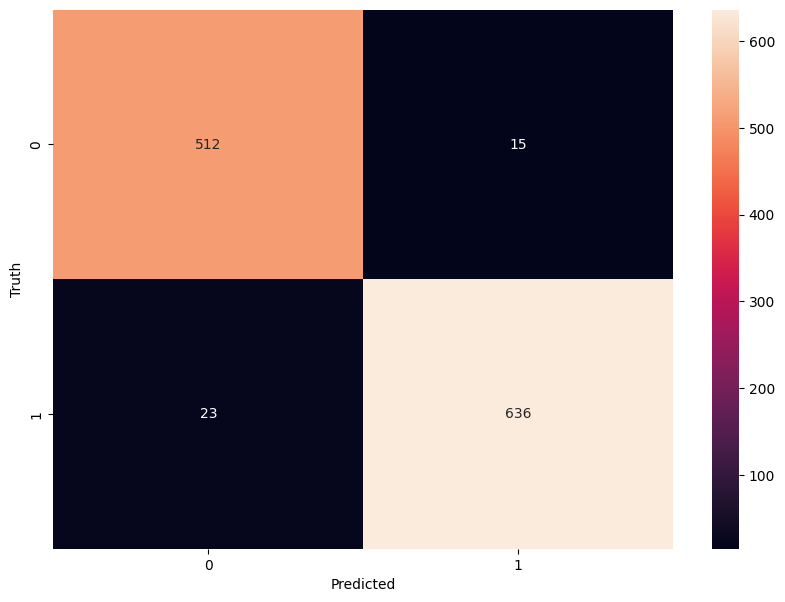

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

# Performing PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.transform(xr_test1)
explained_variance = pca.explained_variance_ratio_

In [ ]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [ ]:
model.fit(xr_train_pca,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
yr_predict_pca = model.predict(xr_test_pca)

In [ ]:
model_score_r_pca = model.score(xr_test_pca, yr_test1)

In [ ]:
print(model_score_r_pca)
print(metrics.classification_report(yr_test1, yr_predict_pca))

0.7386172006745363
              precision    recall  f1-score   support

           0       0.73      0.65      0.69       527
           1       0.74      0.81      0.77       659

    accuracy                           0.74      1186
   macro avg       0.74      0.73      0.73      1186
weighted avg       0.74      0.74      0.74      1186



# Pickling the model

In [ ]:
import pickle

In [ ]:
filename = 'model.sav'

In [ ]:
pickle.dump(model_rf_smote, open(filename, 'wb'))

In [ ]:
load_model = pickle.load(open(filename, 'rb'))

In [ ]:
model_score_r1 = load_model.score(xr_test1, yr_test1)

In [ ]:
print(model_score_r1)